# "Week of Oct21" HW
## Question 1

**Simple Linear Regression** is a method to model the relationship between two variables, consisting of:

1. **Predictor Variable ($X$)**: The independent variable that influences the outcome.
2. **Outcome Variable ($Y$)**: The dependent variable we want to predict.
3. **Coefficients**:
   - **Intercept ($\beta_0$)**: The value of $Y$ when $X$ is zero. 
   - **Slope ($\beta_1$)**: The change in $Y$ for a one-unit increase in $X$. 
4. **Error Term ($\epsilon$)**: The difference between the observed and predicted values of $Y$, assumed to be normally distributed with a mean of zero.

The model can be expressed as:

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

The outcome $Y$ is normally distributed around the line defined by the intercept and slope, with variability introduced by the error term.

Here's a implementation using `numpy` and `scipy.stats` to simulate a simple linear regression dataset:


True Intercept (β0): 3
Estimated Intercept: 2.7338880205338096
True Slope (β1): 2
Estimated Slope: 1.9954196598127762
R-squared: 0.9420022188785017
Standard Error of Slope: 0.07146499283863819
P-value of Slope: 2.473839751893934e-31


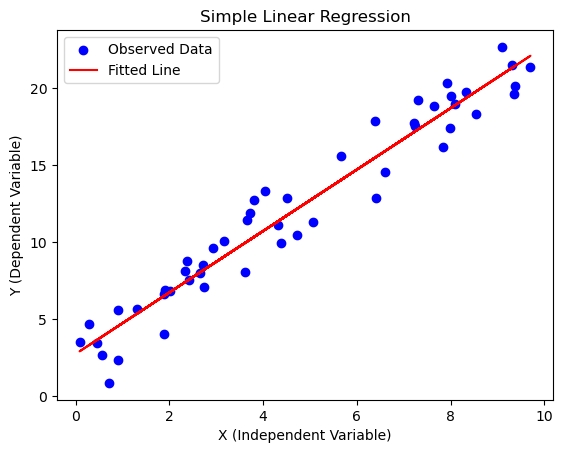

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, uniform, norm

# Set arbitrary parameters
n = 50  # Number of samples
beta0 = 3  # True intercept
beta1 = 2  # True slope
sigma = 1.5  # Standard deviation of noise

# Generate predictor variable (X) from a uniform distribution
X = uniform.rvs(0, 10, size=n)

# Generate random noise (error terms) from a normal distribution
errors = norm.rvs(0, sigma, size=n)

# Create the response variable (Y) using the simple linear model equation
Y = beta0 + beta1 * X + errors

# Perform linear regression using scipy's linregress to estimate beta0 and beta1
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Print the results of the linear regression model
print("True Intercept (β0):", beta0)
print("Estimated Intercept:", intercept)
print("True Slope (β1):", beta1)
print("Estimated Slope:", slope)
print(f"R-squared: {r_value**2}")
print(f"Standard Error of Slope: {std_err}")
print(f"P-value of Slope: {p_value}")

# Predict Y values based on the estimated linear regression model
Y_pred = intercept + slope * X

# Plot the original data and the fitted line
plt.scatter(X, Y, color="blue", label="Observed Data")
plt.plot(X, Y_pred, color="red", label="Fitted Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


### Summary of Interactions with ChatGPT

1. **Theoretical Explanation**:
   - We discussed the theoretical foundation of the Simple Linear Regression (SLR) model, represented by the equation:
     $$ Y = \beta_0 + \beta_1 X + \epsilon $$
     where:
     - $\beta_0$ is the intercept,
     - $\beta_1$ is the slope,
     - $\epsilon$ represents the error term.
   - We covered the assumptions of SLR and the use of the Ordinary Least Squares (OLS) method to estimate model coefficients.

2. **Basic Python Code**:
   - I provided Python code using `numpy` and `scipy.stats.linregress` to fit an SLR model to synthetic data. This initial code included generating synthetic data, fitting a regression line, and visualizing the observed data and fitted line.

3. **Refining the Code**:
   - You suggested creating predictors and error terms separately to better reflect the theoretical model's structure. I refactored the code to define arbitrary parameters for:
     - Sample size ($n$),
     - Predictor values (sampled from a uniform distribution),
     - Slope ($\beta_1$),
     - Intercept ($\beta_0$),
     - Noise scale (sampled from a normal distribution).
   - We combined these components to generate the response variable $Y$ and then applied the SLR model to estimate parameters.

4. **Final Output**:
   - The refined code outputs true and estimated values for the intercept and slope, additional statistics like R-squared and p-value, and plots the observed data and fitted line for visualization.

This iterative approach provided a step-by-step demonstration of creating and analyzing a linear regression model in Python based on theoretical principles.


[Chatbot transcript](https://chatgpt.com/share/6723ce3f-2014-800f-b660-41dac5f63b84)

## Question 2


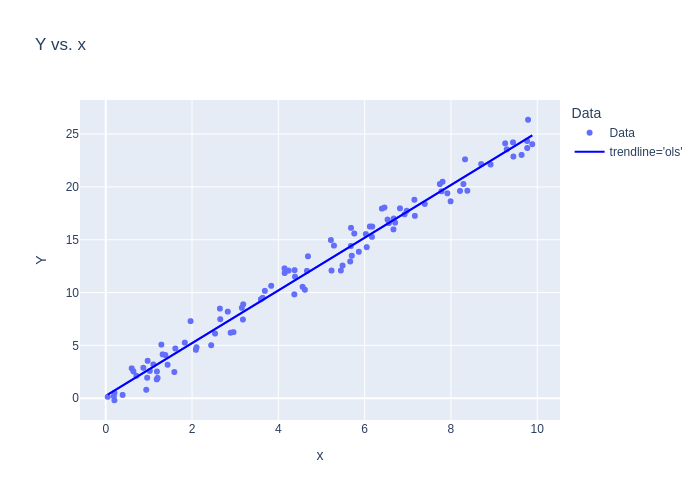

In [6]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  # This library is used for statistical modeling in Python, specifically for fitting linear models.
import plotly.express as px  # This is a plotting library that simplifies the process of creating interactive visualizations.

# Simulate data
np.random.seed(0)  # For reproducibility
n = 100  # Number of data points
x = np.random.rand(n) * 10  # Random x values between 0 and 10
Y = 2.5 * x + np.random.randn(n)  # Y is a linear function of x with some noise

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Model specification and fitting
model_data_specification = smf.ols("Y ~ x", data=df)  # This specifies the linear regression model with Y as the dependent variable and x as the independent variable.
fitted_model = model_data_specification.fit()  # This fits the specified model to the data.

# Summaries of the fitted model
fitted_model.summary()  # This provides a detailed summary of the regression analysis, including coefficients, p-values, and other statistics.
fitted_model.summary().tables[1]  # This specifically provides the coefficients of the model, including the estimates, standard errors, t-values, and p-values for each variable.
fitted_model.params  # This returns the estimated coefficients for the model.
fitted_model.params.values  # This returns the estimated coefficients as a NumPy array.
fitted_model.rsquared  # This returns the R-squared value, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

# Add a column for legend purposes
df['Data'] = 'Data'  # This adds a column to the DataFrame for the legend in the plot.

# Create the scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Creates a scatter plot with an OLS trendline.

# Adding the fitted values as a line to the figure
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # This adds a blue line representing the fitted values from the model.

# Show the figure
fig.show(renderer="png")  


### Summary of Interactions with ChatGPT
1. Objective: You wanted to create and visualize a fitted Simple Linear Regression model using a simulated dataset, with specific explanations for the code provided.

2. Code Explanation:

- We discussed the purpose of the `statsmodels` library for statistical modeling in Python.
- The process of specifying and fitting a linear regression model was explained through the code.
- We covered the significance of various outputs from the fitted model, including the summary, coefficient table, parameters, and R-squared value.
3. Visualization:

- The use of `Plotly` for creating interactive scatter plots and adding a trendline was highlighted.
- The code was adjusted to incorporate a legend and demonstrate how to visualize the fitted regression line alongside the scatter plot of the data.
4. Outcome: You received a comprehensive code snippet along with detailed explanations for each part, allowing you to understand the mechanics behind fitting and visualizing a Simple Linear Regression model in Python.

[Chatbot transcript](https://chatgpt.com/share/6723cfe1-cdc0-800f-931b-2eaed77fb75e)

## Question 3

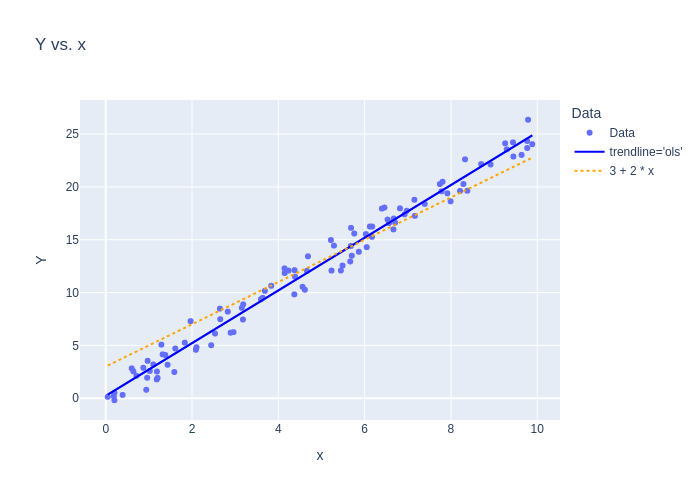

In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  # This library is used for statistical modeling in Python, specifically for fitting linear models.
import plotly.express as px  # This is a plotting library that simplifies the process of creating interactive visualizations.

# Simulate data
np.random.seed(0)  # For reproducibility
n = 100  # Number of data points
x = np.random.rand(n) * 10  # Random x values between 0 and 10
Y = 2.5 * x + np.random.randn(n)  # Y is a linear function of x with some noise

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Model specification and fitting
model_data_specification = smf.ols("Y ~ x", data=df)  # This specifies the linear regression model with Y as the dependent variable and x as the independent variable.
fitted_model = model_data_specification.fit()  # This fits the specified model to the data.

# Summaries of the fitted model
fitted_model.summary()  # This provides a detailed summary of the regression analysis, including coefficients, p-values, and other statistics.
fitted_model.summary().tables[1]  # This specifically provides the coefficients of the model, including the estimates, standard errors, t-values, and p-values for each variable.
fitted_model.params  # This returns the estimated coefficients for the model.
fitted_model.params.values  # This returns the estimated coefficients as a NumPy array.
fitted_model.rsquared  # This returns the R-squared value, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

# Add a column for legend purposes
df['Data'] = 'Data'  # This adds a column to the DataFrame for the legend in the plot.

# Create the scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Creates a scatter plot with an OLS trendline.

# Adding the fitted values as a line to the figure
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")  # This adds a blue line representing the fitted values from the model.


# Representing a simple linear regression line
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

- The scatter plot displays the observed data points, while the blue line represents the fitted values from the regression model.
- The dashed yellow line represents the theoretical linear relationship based on the coefficients estimated from the fitted model.
- The visual comparison helps illustrate how the fitted model approximates the true relationship described by the theoretical model.

#### OLS Regression Line
- **Nature**: Represents the best-fit line derived from actual data using Ordinary Least Squares (OLS), minimizing the sum of squared differences between observed and predicted values.
- **Sampling Variation**: Accounts for random sampling variation, capturing the true relationship between $X$ and $Y$ while reflecting natural variability due to the error term $\epsilon$.
- **Interpretation**: Provides reliable predictions based on empirical evidence and accurately reflects the average trend in the data.

#### Theoretical Line
- **Nature**: Based on predefined coefficients $\beta_0$ and $\beta_1$ chosen arbitrarily, not derived from the actual data.
- **Sampling Variation**: Does not account for random sampling variation and may not reflect the true relationship between $X$ and $Y$.
- **Interpretation**: The custom line allows you to explore hypothetical scenarios and understand the impact of different coefficients on the model. This can be useful for sensitivity analysis or educational purposes. 

The random variation inherent in the data is crucial to understanding the Simple Linear Regression model. The code emphasizes that the OLS regression line is fitted to minimize the impact of this variability, resulting in a more accurate representation of the relationship between $X$ and $Y$.

The theoretical line, however, does not account for this randomness, which may lead to misleading conclusions if one were to rely solely on it without considering the actual data.

- Visualizing both lines on the same plot helps in understanding the data distribution and the fitting quality of both approaches. It provides a clear graphical representation of the relationship between the variables.


So, 
- The OLS line is derived from the sample data and minimizes the sum of squared residuals (differences between observed and predicted values), making it the best approximation of the true relationship based on that particular sample. It changes slightly with each new sample due to random errors present in the data.


- The theoretical line, in contrast, represents the underlying true relationship with known parameters and without any sampling error, so it’s not influenced by randomness.

### Summary of Interactions with ChatGPT
1. **Adding Custom Regression Line**:
   - You provided a code snippet that adds a custom linear regression line to a figure using predefined coefficients ($\beta_0$ and $\beta_1$).
   - The code calculates the $y$-values for the range of $x$-values and adds the line to the plot, with specific formatting (dashed and colored).

2. **Comparison with OLS Trendline**:
   - We discussed how this custom line represents a simple linear regression based on arbitrary coefficients, contrasting it with an OLS trendline derived from fitting a linear model to the data.
   - The custom line may or may not accurately reflect the actual relationship in the data, depending on the chosen coefficients.

3. **Purpose of Comparing Lines**:
   - We explored the purpose of comparing the custom regression line with the OLS trendline. Key points included:
     - **Understanding Model Fit**: Assessing how well the predefined coefficients represent the data.
     - **Model Validation**: Identifying if the chosen parameters are suitable for the data.
     - **Hypothetical Scenarios**: Exploring the impact of different coefficients on the model.
     - **Visual Insights**: Providing a clear graphical representation of the relationships.
     - **Communication**: Enhancing interpretability in presentations or reports by showing both approaches.

This discussion highlighted the importance of understanding model assumptions, fitting quality, and how visual comparisons can aid in analysis and communication of findings.

[Chatbot transcript](https://chatgpt.com/share/6723ce3f-2014-800f-b660-41dac5f63b84)

## Question 4

1. **Fitted Model Equation**:
   The fitted model for a simple linear regression is expressed as:
   $
   \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots + \hat{\beta}_k X_k
   $
   Where:
   - $\hat{Y}$: Predicted values (fitted values)
   - $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_k$: Estimated coefficients from the model.

2. **Accessing Parameters**:
   - `fitted_model.params`: Contains the estimated coefficients. Once the model is fitted, you can access the estimated coefficients through this

3. **Calculating Fitted Values**:
   - Fitted values are calculated using the formula above for each observation:
   $
   \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_{1i}
   $
   - This calculation is performed automatically when you call `fitted_model.fittedvalues`.

4. **Model Summary**:
   - `fitted_model.summary().tables[1]` provides detailed statistics, including the coefficients and their significance, which helps interpret the fitted model.
 

#### Summary 
How `fitted_model.fittedvalues` is derived:

1. **Retrieve Model Coefficients**: When fitting a simple linear regression model, `statsmodels` calculates and stores the estimated intercept and slope in `fitted_model.params`. The intercept represents the predicted value of the outcome variable when the predictor is zero, and the slope represents the rate of change in the outcome variable for each one-unit increase in the predictor variable.

2. **Calculate Predicted Values**: For each observation in the dataset, `fitted_model.fittedvalues` is computed by using the regression equation:
   $$
   \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i
   $$
   Here, $\hat{\beta}_0$ (the intercept) and $\hat{\beta}_1$ (the slope) are taken from `fitted_model.params`, and $X_i$ is the predictor value for each data point.

3. **Generate `fitted_model.fittedvalues`**: This series contains the predicted values $\hat{Y}_i$ for each observation, calculated using the estimated intercept and slope with each $X_i$ in the dataset. These values form the "best-fit" line for the data, representing the model's in-sample predictions.



### Summary of Interactions with ChatGPT
1. Fitted Model and Predictions
- You inquired about how `fitted_model.fittedvalues` are derived from `fitted_model.summary().tables[1]`, specifically focusing on `fitted_model.params`.
- We discussed the theoretical model of simple linear regression, represented as:

  $$ Y = \beta_0 + \beta_1 X + \epsilon $$

  and how the fitted model uses estimated coefficients to make predictions, expressed as:

  $$ \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X $$

- We explained that in-sample predictions are calculated using the fitted model's coefficients for each observation in the dataset.

2. In-Sample Predictions
- We distinguished between theoretical predictions and in-sample predictions made using the fitted model, emphasizing the role of residuals in assessing the model's accuracy.
- We provided example code demonstrating how to fit a linear regression model, retrieve coefficients, and compute fitted values using the `statsmodels` library.

3. Visualization
- To illustrate these concepts, we included a code snippet for visualizing the observed data and the fitted regression line, helping to contextualize the theoretical vs. fitted model.
4. Conclusion
- The discussion underscored the process of model fitting, coefficient estimation, and the interpretation of fitted values in the context of regression analysis.


[Chatbot transcript](https://chatgpt.com/share/6723da28-6a04-800f-b2ba-f52845761df7)

## Question 5

The "ordinary least squares" (OLS) method finds the best-fitting line by minimizing the sum of the squared differences (residuals) between observed and predicted values. The "squares" ensure larger errors have a greater impact, emphasizing significant deviations, and prevent negative errors from canceling positive ones, ensuring a clear measure of overall error.

Based on this visualization:

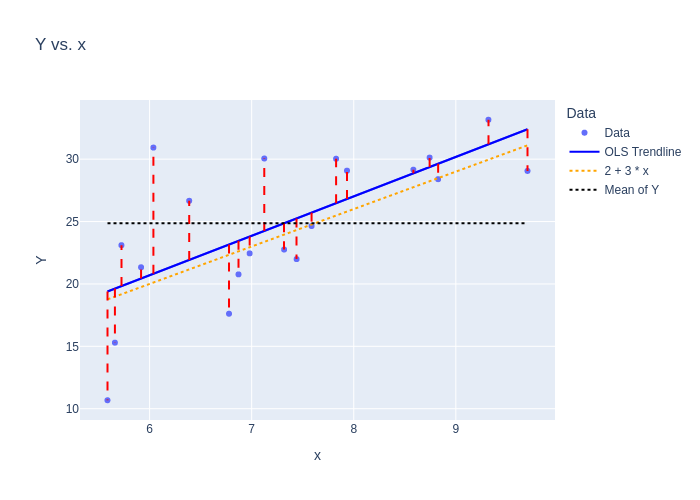

In [8]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5

# Data generation
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

# DataFrame creation
df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

# Add a label for the scatter plot legend
df['Data'] = 'Data'

# Scatter plot with OLS trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted line explicitly
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="OLS Trendline")

# True line based on parameters
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=f"{beta0} + {beta1} * x", line=dict(dash='dot', color='orange'))

# Add residuals as vertical lines
for i in range(len(df)):
    fig.add_scatter(x=[df['x'].iloc[i], df['x'].iloc[i]],
                    y=[fitted_model.fittedvalues.iloc[i], df['Y'].iloc[i]],
                    mode='lines', line=dict(color='red', dash='dash'), showlegend=False)

# Add mean line of Y
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines', line=dict(color='black', dash='dot'), name='Mean of Y')

fig.show(renderer = "png")


1.  Residuals are the vertical differences between the observed data points and the fitted values from the regression line (OLS trendline).
    - In the visualization, residuals are represented by red dashed vertical lines between each observed point (Y) and its predicted value from the OLS line. These residuals indicate how well the model fits the observed data. 
    - Small residuals suggest a good fit, while large residuals indicate that the model's predictions deviate significantly from the observed data.
    - Residuals are calculated from the fitted model (OLS trendline) and observed data. 
2. Error terms (or noise) are the theoretical, unobservable deviations of actual data points from the true underlying relationship (beta0 + beta1 * x), due to randomness or other factors.
    -  In the visualization, the orange dotted line represents the true underlying model (beta0 + beta1 * x). The difference between this true line and the observed points (Y) would conceptually include both residuals and the true error terms, though only residuals are plotted.
    - Error Terms are based on the true, unobservable model (beta0, beta1) and include random noise (errors in the data generation process).

### Summary of Interactions with ChatGPT

1. OLS Explanation: We discussed how the Ordinary Least Squares (OLS) method finds the best-fitting line by minimizing the sum of squared residuals, emphasizing that squaring the residuals prevents cancellation of errors and gives more weight to larger deviations.

2. Visualization Explanation: You provided a code snippet for visualizing OLS regression, including observed data, the fitted OLS trendline, the true line (theoretical model), and residuals. I explained the distinction between residuals (observable deviations from the fitted model) and error terms (theoretical deviations from the true model) using this visualization.

3. Code Troubleshooting: We reviewed the code for potential issues, ensuring proper calculation and display of the OLS trendline, true line, residuals, and mean line.

4. Clarifying Residuals vs. Error Terms: The discussion highlighted how the visualization shows residuals (red dashed lines) as the difference between observed values and the OLS predictions, and contrasted these with unobservable theoretical error terms.

[Chatbot transcript](https://chatgpt.com/share/672963d9-b130-800f-8136-2dc1abfeed79)

## Question 6

The expression $1 - \frac{\sum (Y - \text{fitted\_model.fittedvalues})^2}{\sum (Y - \bar{Y})^2}$ represents the proportion of the total variation in $Y$ explained by the model, which is the $R^2$ value. This value measures how well the model's predictions match the observed data, indicating the accuracy of the model. Similarly, `fitted_model.rsquared` directly provides this $R^2$ value. The expression `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` captures the squared correlation between the observed and predicted values, which also corresponds to $R^2$. In simple linear regression, `np.corrcoef(Y,x)[0,1]**2` calculates the $R^2$ value as the squared correlation between $Y$ and the predictor $x$, showing the proportion of variance in $Y$ explained by $x$.


### Summary of Interactions with ChatGPT

- **Topic**: Metrics in Simple Linear Regression models.
- **Focus**:
  1. The proportion of variation in the outcome $Y$ explained by the model.
  2. Interpretation of $R^2$ (R-squared) using three different expressions:
     - $1 - \frac{\text{RSS}}{\text{TSS}}$ (explained variance ratio)
     - `fitted_model.rsquared` (direct $R^2$ output from statistical software)
     - Squared correlation coefficients between $Y$ and both the fitted values and predictor $x$ (`np.corrcoef`).
- **Conclusion**: All these expressions in the context of Simple Linear Regression ultimately measure $R^2$, representing the proportion of variance in $Y$ explained by the model, indicating its accuracy or goodness-of-fit.


[Chatbot transcript](https://chatgpt.com/share/672aea45-bdd0-800f-900b-0ed2ed36bc72)

## Question 7

There are a couple of potential issues with the assumptions of simple linear regression that may arise from this dataset:
1. Linearity:
- The relationship between the amount of fertilizer and crop yield does not appear to be strictly linear. From the scatter plot, we can see that the yield increases rapidly at first, then starts to level off as the fertilizer amount increases. This suggests a possible non-linear relationship (e.g., diminishing returns), which would violate the linearity assumption. In a simple linear regression model, we would expect a consistent change in yield for every unit increase in fertilizer, but the data suggests a more complex pattern.

2. Homoscedasticity:
- Homoscedasticity means that the variance of the residuals should be constant across all levels of the independent variable (amount of fertilizer). If you inspect the residuals histogram, you might notice that the spread of residuals could vary across different levels of fertilizer. For example, at lower fertilizer levels, the residuals might appear more tightly clustered around zero, while at higher levels of fertilizer, the residuals may show more variation. This suggests heteroscedasticity, which violates the assumption of constant variance.

### Summary of Interactions with ChatGPT

1. Simple Linear Regression Assumptions:
   - We discussed the key assumptions of simple linear regression, including linearity, independence, homoscedasticity, normality of residuals, and no multicollinearity. Violations of these assumptions can lead to biased or misleading results.

2. Example Data (Fertilizer and Crop Yield):
    - You provided data showing the relationship between the amount of fertilizer used and crop yield. I identified two potential issues with the assumptions of simple linear regression:

        - Linearity: The relationship between fertilizer and crop yield appears non-linear, which may violate the linearity assumption.
        - Homoscedasticity: The residuals may show varying spread across different levels of fertilizer, indicating possible heteroscedasticity.
3. Suggestions:

    - For the non-linear relationship, a transformation of the data (e.g., quadratic or logarithmic) or using polynomial regression might be appropriate.
    - To address heteroscedasticity, techniques like generalized least squares or weighted least squares could be explored.

[Chatbot transcript](https://chatgpt.com/share/672aeb69-c060-800f-997f-5974fedcedfc)

## Question 8


In [9]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        05:15:09   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are testing the null hypothesis $$ H_0: \beta_1 = 0 $$ against the alternative hypothesis $$ H_1: \beta_1 \neq 0 $$ which would indicate a significant linear relationship between waiting time and duration of the eruption.


Interpretation of the Results:

- If the **p-value** for $$ \beta_1 $$ is less than 0.05, we reject the null hypothesis and conclude that there is a significant linear relationship between waiting time and eruption duration.
- If the **p-value** is greater than 0.05, we fail to reject the null hypothesis, indicating no significant linear relationship.


Based on the output from the regression summary:
- The p-value for the waiting coefficient is 0.000 (much less than 0.05), meaning we can reject the null hypothesis that there is no linear relationship between `waiting` and `duration`. There is a statistically significant linear relationship.

### Summary of Interactions with ChatGPT

Key Points:
1. **Model Fit:**
   - **R-squared = 0.811**: The model explains **81.1%** of the variance in eruption duration using the waiting time as the predictor. This indicates a strong model fit.
   - **Adjusted R-squared = 0.811**: This confirms that the model is not overfitting and is well-suited for the data.

2. **Statistical Significance:**
   - The **p-value for the `waiting` coefficient** is **0.000**, which is much less than 0.05, allowing us to **reject the null hypothesis**. This shows that there is a statistically significant linear relationship between waiting time and eruption duration.

3. **Interpretation of Coefficients:**
   - **Intercept = -1.874**: When the waiting time is 0 minutes (theoretically), the predicted eruption duration is -1.874 minutes, though this is not practically meaningful.
   - **Coefficient for `waiting` = 0.0756**: For each additional minute spent waiting, the eruption duration is expected to increase by **0.076 minutes (4.56 seconds)** on average.

4. **Model Diagnostics:**
   - **Durbin-Watson = 2.561**: No significant autocorrelation in residuals, which is good for the model’s assumptions.
   - **Normality of Residuals**: The **Omnibus test** and **Jarque-Bera test** (with p-values 0.127 and 0.205, respectively) suggest that the residuals are normally distributed, validating the model assumptions.

### Conclusion:
- The **Old Faithful Geyser dataset** reveals a **significant linear relationship** between waiting time and eruption duration.
- The model is statistically robust, with a high R-squared and no major issues with residuals.
- **Practical Implication**: Each additional minute of waiting corresponds to an increase of about **4.56 seconds** in eruption duration, highlighting a predictable relationship between the two variables.

This regression analysis provides useful insights into how waiting time influences the eruption duration of Old Faithful.


[Chatbot transcript](https://chatgpt.com/share/672aede2-0cdc-800f-8f4b-06c6b1bdfebf)

## Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


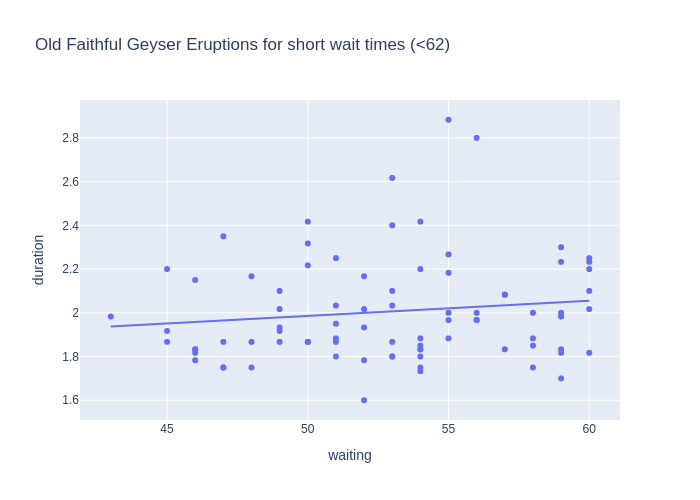

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


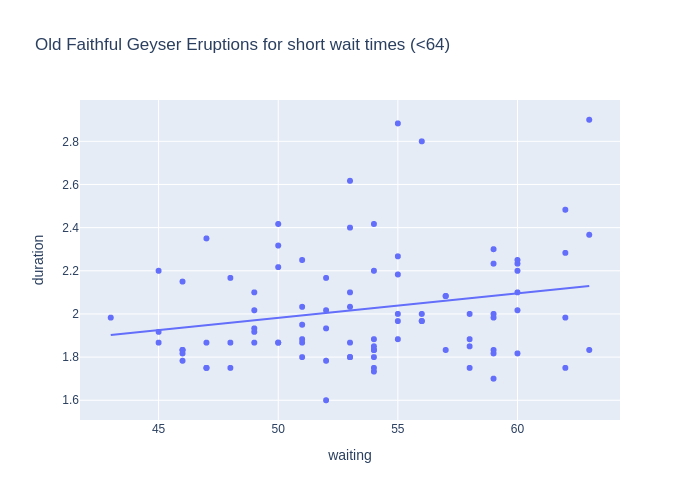

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


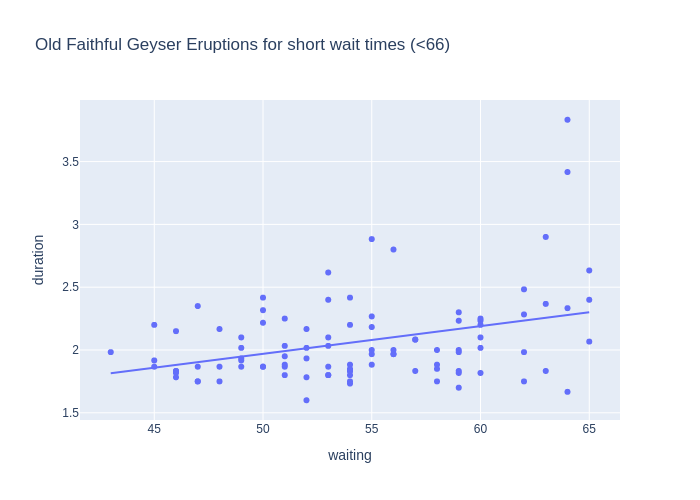

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

#### Evidence for a Relationship Between Duration and Wait Time for Short Wait Times (< 62, 64, 66 minutes)

 **For short_wait_limit = 62:**
- **P-value** for waiting time coefficient: **0.238**.
- **Conclusion**: The relationship between waiting time and eruption duration is **not statistically significant**. We **fail to reject the null hypothesis** (no relationship).


**For short_wait_limit = 64:**
- **P-value** for waiting time coefficient: **0.036**.
- **Conclusion**: **p-value < 0.05**, the relationship is **statistically significant**. We **reject the null hypothesis** (there is a relationship). The positive coefficient indicates that longer waiting times are associated with longer eruption durations. So as the waiting time increases, the eruption duration will also increase.

**For short_wait_limit = 66:**
- **P-value** for waiting time coefficient: **0.000**.
- **Conclusion**: The relationship between waiting time and eruption duration is **statistically significant**. We **reject the null hypothesis** (there is a relationship). The positive coefficient (0.0221) suggests that longer waiting times are associated with longer eruption durations. So as the waiting time increases, the eruption duration will also increase.


### Summary of Interactions with ChatGPT

1. Old Faithful Geyser Analysis:

- You started by analyzing the relationship between waiting time and eruption duration in the Old Faithful Geyser dataset. You used Plotly and Seaborn to visualize the data and employed statistical techniques like linear regression (OLS) and LOWESS (Locally Weighted Scatterplot Smoothing) to explore potential trends.

2. LOWESS and OLS Trendlines:

- We discussed how a LOWESS trendline smooths the data more flexibly than a simple linear regression (OLS trendline), which assumes a linear relationship between the variables.
- The full dataset revealed a complex relationship, where waiting time of over 63 minutes led to an increase in eruption duration.

3. Focusing on Short Wait Times:

- You then restricted the dataset to only short wait times (less than 62 minutes) to investigate if the relationship between waiting time and eruption duration held true for shorter waiting periods.
- The regression results indicated that, for waiting times under 62 minutes, the relationship between waiting time and eruption duration was not statistically significant (p-value = 0.238), meaning there was no strong evidence of a linear relationship.

4. Further Analysis with Different Wait Time Limits (62, 64, 66 minutes):

- We discussed running the same analysis for different short wait time limits (62, 64, and 66 minutes) to see if the relationship between waiting time and eruption duration becomes more evident as the waiting time threshold increases.
- For each of these limits, you would use OLS regression to check the p-value for the relationship between waiting time and eruption duration. If the p-value is less than 0.05, it suggests a significant relationship, and if it’s greater, the relationship remains weak or insignificant.

[Chatbot transcript](https://chatgpt.com/share/672af154-8430-800f-b982-6ac52944d259)

## Question 10


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


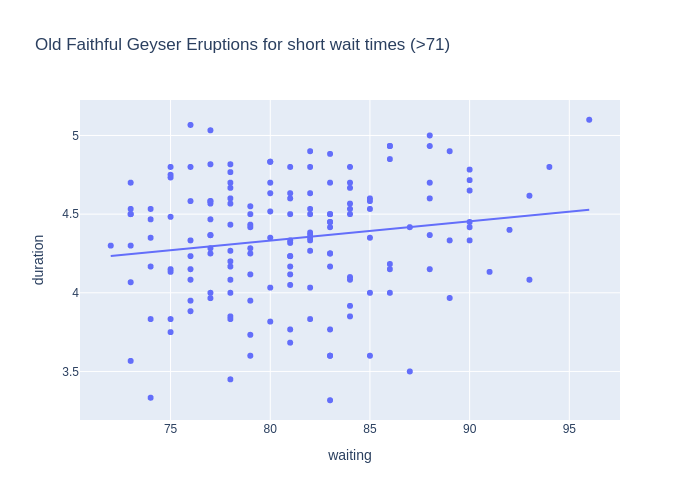

In [13]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") 

#### 1. To generate bootstrap samples and collect the distribution of slope coefficients for linear regression models

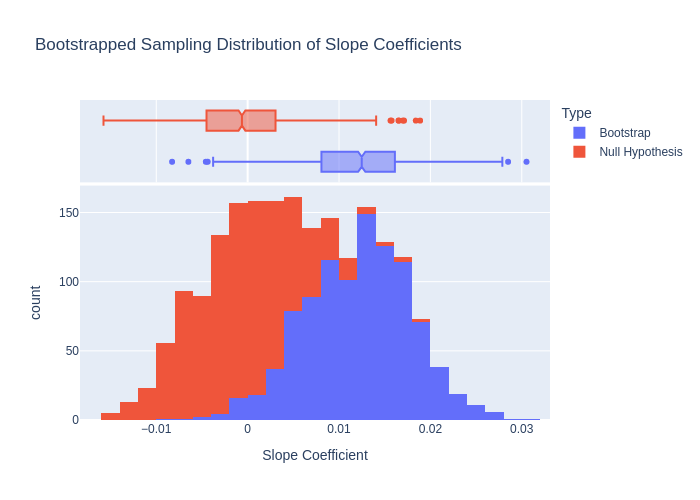

In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

# Parameters
n_bootstrap_samples = 1000
long_wait_limit = 71

# Filter the dataset for long wait times
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Collect bootstrap slopes
bootstrap_slopes = []

# Perform bootstrap sampling and fit linear regression models
for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=long_wait.sum(), replace=True)
    
    # Fit the model and extract the slope
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    slope = model.params['waiting']
    
    # Collect the slope
    bootstrap_slopes.append(slope)

# Simulate null hypothesis dataset
old_faithful_simulation = long_wait_data.copy()
old_faithful_simulation['duration'] = (
    1.65 + 0 * old_faithful_simulation['waiting'] 
    + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
)

# Collect null hypothesis slopes
null_slopes = []

for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample from the simulated null dataset
    bootstrap_sample = old_faithful_simulation.sample(n=long_wait.sum(), replace=True)
    
    # Fit the model and extract the slope
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    slope = model.params['waiting']
    
    # Collect the slope
    null_slopes.append(slope)

# Convert results to DataFrames for visualization
bootstrap_df = pd.DataFrame({'Slope': bootstrap_slopes, 'Type': 'Bootstrap'})
null_df = pd.DataFrame({'Slope': null_slopes, 'Type': 'Null Hypothesis'})
results_df = pd.concat([bootstrap_df, null_df])

# Plot the distributions of the slopes
fig = px.histogram(results_df, x='Slope', color='Type', 
                   marginal="box", 
                   title="Bootstrapped Sampling Distribution of Slope Coefficients",
                   nbins=30,
                   labels={'Slope': 'Slope Coefficient'})
fig.show(renderer="png")


Bootstrapping: We generate n_bootstrap_samples bootstrap samples from the long wait time data, fit a linear regression model to each, and store the slope coefficient.


Null Hypothesis Simulation: We create a null hypothesis dataset where duration is generated as random noise around a mean (with no dependence on waiting), simulating no linear association.


Visualization: We visualize both the bootstrap slopes and null hypothesis slopes to see the differences in their distributions.

#### 2. To simulate samples under the null hypothesis of "no linear association"

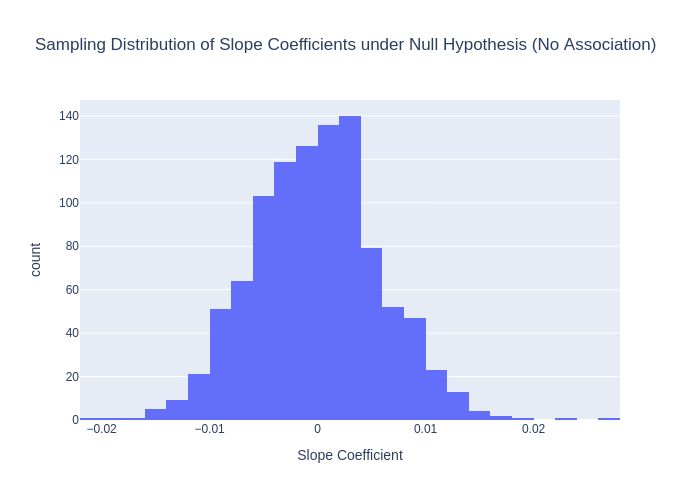

In [15]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

# Define the parameters
n_simulations = 1000  # Number of simulations
sample_size = 160
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

# Use the waiting times from the "long wait times" dataset
long_wait_data = old_faithful[old_faithful['waiting'] > 71]
waiting_values = long_wait_data['waiting']

# Ensure that we have enough data points to sample n=160
assert len(waiting_values) >= sample_size, "Not enough data points for specified sample size."

# Collect null hypothesis slopes
null_slope_coefficients = []

# Perform simulations
for _ in range(n_simulations):
    # Draw a sample of 160 waiting times with replacement
    waiting_sample = waiting_values.sample(n=sample_size, replace=True)
    
    # Generate a simulated response variable Y under the null hypothesis
    simulated_duration = beta_0 + beta_1 * waiting_sample + stats.norm(0, sigma).rvs(size=sample_size)
    
    # Create a temporary DataFrame to fit the model
    simulated_data = pd.DataFrame({'waiting': waiting_sample, 'duration': simulated_duration})
    
    # Fit the model and extract the slope coefficient
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    slope = model.params['waiting']
    
    # Collect the slope coefficient
    null_slope_coefficients.append(slope)

# Convert results to a DataFrame for visualization
null_slopes_df = pd.DataFrame({'Slope': null_slope_coefficients})

# Plot the distribution of the null hypothesis slopes
fig = px.histogram(null_slopes_df, x='Slope', nbins=30, 
                   title="Sampling Distribution of Slope Coefficients under Null Hypothesis (No Association)",
                   labels={'Slope': 'Slope Coefficient'})
fig.show(renderer="png")


- Parameter Setup


We define the model parameters as follows:

- $\beta_0 = 1.65$
- $\beta_1 = 0$ (this reflects the **null hypothesis** of "no linear association")
- $\sigma = 0.37$ (standard deviation of the error term)

We set the sample size to $n = 160$.

- Waiting Times Sample


We sample from the "long wait times" data to simulate the predictor variable, `waiting`.

- Simulated Responses


For each sample, we generate simulated duration values using the following formula:

$$Y = \beta_0 + \beta_1 \cdot X + \epsilon$$

Where:
- $\epsilon \sim \text{Normal}(0, \sigma)$ (random errors drawn from a normal distribution with mean 0 and standard deviation $\sigma$).

- Slope Collection


We fit a simple linear regression model to each simulated dataset and collect the slope coefficients, which represent the relationship between `waiting` and `duration` under the null hypothesis.

- Visualization


Finally, we plot the sampling distribution of the slope coefficients under the null hypothesis assumption of **no linear association**.


#### 3. 

In [16]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Perform bootstrap sampling to collect slopes
bootstrap_slopes = []
for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    # Fit the model and collect the slope
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    slope = model.params['waiting']
    bootstrap_slopes.append(slope)

# Calculate the 95% bootstrapped confidence interval for the slope
bootstrap_slope_array = np.array(bootstrap_slopes)
ci_lower = np.percentile(bootstrap_slope_array, 2.5)  # 2.5th percentile
ci_upper = np.percentile(bootstrap_slope_array, 97.5)  # 97.5th percentile
print(f"95% Bootstrapped Confidence Interval for the slope: ({ci_lower:.4f}, {ci_upper:.4f})")

# Check if the null hypothesis slope (beta_1 = 0) is inside the confidence interval
null_hypothesis_slope = 0
contains_null = ci_lower <= null_hypothesis_slope <= ci_upper
print(f"Does the null hypothesis slope (0) lie within the 95% confidence interval? {contains_null}")

# Perform regression on the actual data and get the p-value
model_actual = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = model_actual.params['waiting']
observed_p_value = model_actual.pvalues['waiting']
print(f"Observed slope: {observed_slope:.4f}")
print(f"Observed p-value: {observed_p_value:.4f}")

# Simulate under the null hypothesis (beta_1 = 0) to get a distribution of slopes
null_slope_coefficients = []
for _ in range(n_bootstrap_samples):
    # Simulate the response variable under the null hypothesis (beta_1 = 0)
    simulated_duration = 1.65 + 0 * old_faithful[long_wait]['waiting'] + stats.norm(0, 0.37).rvs(size=long_wait.sum())
    simulated_data = pd.DataFrame({'waiting': old_faithful[long_wait]['waiting'], 'duration': simulated_duration})
    
    # Fit the model to the simulated data and collect the slope
    model_simulated = smf.ols('duration ~ waiting', data=simulated_data).fit()
    slope_simulated = model_simulated.params['waiting']
    null_slope_coefficients.append(slope_simulated)

# Calculate the p-value for the null hypothesis by comparing the observed slope to the null simulation
null_slope_array = np.array(null_slope_coefficients)
simulated_p_value = np.mean(null_slope_array >= observed_slope)
print(f"Simulated p-value: {simulated_p_value:.4f}")

# Comparison of simulated p-value and actual p-value
if np.abs(simulated_p_value - observed_p_value) < 0.05:
    print("The simulated p-value is approximately equal to the observed p-value.")
else:
    print("The simulated p-value is not approximately equal to the observed p-value.")


95% Bootstrapped Confidence Interval for the slope: (0.0005, 0.0230)
Does the null hypothesis slope (0) lie within the 95% confidence interval? False
Observed slope: 0.0122
Observed p-value: 0.0381
Simulated p-value: 0.0210
The simulated p-value is approximately equal to the observed p-value.


### Summary of Interactions with ChatGPT

#### Objective
You are working with the Old Faithful Geyser dataset, specifically analyzing "long wait times" to study the relationship between waiting time and eruption duration. The goal is to assess this relationship using bootstrapping and simulation techniques.

#### Analysis Steps

1. **Fitting a Simple Linear Regression**: 
   - A simple linear regression model was initially fitted on the long wait times data to obtain the observed slope coefficient and p-value for the relationship between `waiting` and `duration`.

2. **Bootstrapped Confidence Interval for the Slope**: 
   - To estimate a 95% confidence interval for the slope coefficient, multiple bootstrapped samples were generated from the long wait times data.
   - A regression model was fitted on each bootstrapped sample, collecting the slope coefficients to form a sampling distribution.
   - This confidence interval allows you to check if the null hypothesis slope of zero (indicating no relationship) lies within the range of likely slopes observed in these samples.

3. **Simulated p-value Calculation**:
   - A simulated dataset was generated under a null hypothesis of no linear association (slope = 0) between waiting and duration.
   - Using these simulated samples, a **simulated p-value** was calculated by finding the proportion of slopes as extreme as or more extreme than the observed slope. This simulated p-value provides a comparison point for the p-value obtained from the actual data.

4. **Comparison of Results**:
   - The bootstrapped confidence interval helps determine whether the null hypothesis slope (0) lies within the range of likely slopes, based on the bootstrapped samples.
   - The simulated p-value allows a comparison with the observed p-value from the actual data, enabling you to verify consistency between the bootstrap and simulation-based hypothesis testing methods.

#### Code Implementation
The code provided:
   - Generates bootstrapped samples to calculate the confidence interval for the slope coefficient.
   - Simulates data under the null hypothesis (no relationship) to calculate a simulated p-value.
   - Fits linear models on each sample, collects the slope coefficients, and then compares them to the observed slope from the actual data to determine the confidence interval and p-value.

#### Summary
This analysis approach provides a robust assessment of the association between `waiting` and `duration` using bootstrapping and simulation. The results allow you to determine whether the observed relationship is statistically significant, or if it could be attributed to random chance under the null hypothesis.



[Chatbot transcript](https://chatgpt.com/c/672be79b-0de0-800f-9805-238e33551bc8)

## Question 11

#### Model Specification
1. Original Model:`smf.ols('duration ~ waiting', data=old_faithful)`
- This model fits a simple linear regression using waiting as the continuous predictor for duration. It assumes a linear relationship between the two variables, `waiting` and `duration`.
2. Short Waits Only: `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
- This model restricts the dataset to "short" wait times only, and models `duration` as a function of `waiting` just for this subset. This creates a linear regression on just a single category of the wait time variable.
3. Long Waits Only: `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`
- Similarly, this model focuses on "long" wait times only and creates a linear regression for `duration` based on `waiting` for the long wait group.
4. New Model with Indicator Variable (kind): `smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)`
- In this case, we are using a categorical variable (`kind`) to model the duration. The new model uses `C(kind, Treatment(reference="short"))`, which creates a binary indicator variable that distinguishes between "short" and "long" wait times.
- `Treatment(reference="short")`: Specifies that the "short" wait time category is the reference group. This means that the regression will estimate the effect of "long" wait times relative to "short" wait times.

#### "big picture" comparison of these model specifications:
1. Old Models Using waiting as a Continuous Predictor
- Single Model (`smf.ols('duration ~ waiting', data=old_faithful)`):
    - This model assumes a linear relationship between `waiting` (in minutes) and `duration` for the entire dataset.
    - The goal is to understand how `waiting` predicts `duration` across all wait times, without grouping or categorizing them.
    - This approach assumes that the same linear relationship holds regardless of whether the wait time is "short" or "long."
- Subset Models (`smf.ols('duration ~ waiting', data=old_faithful[short_wait])` and `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`):
    - By splitting the data into "short" and "long" groups and fitting separate models, we can observe if there are different linear relationships within each group.
    - Each subset model provides insights into the relationship between `waiting` and `duration` specifically for "short" or "long" wait times, but does not allow for a direct comparison between the two groups.
    - These models assume that wait times have continuous effects within each group and do not account for potential categorical differences between the groups.
2. New Model Using an Indicator Variable (`kind`)
- Model with Indicator Variable (`smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)`):
    - Instead of focusing on the exact numeric value of `waiting`, this model uses a categorical indicator variable (`kind`) to classify each wait time as either "short" (<68) or "long" (≥68).
    - By specifying "short" as the reference group, the model tests whether the `duration` differs significantly between the "short" and "long" groups on average.
    - This approach is valuable because it allows us to test if there’s an average difference in `duration` based on the wait time category alone, independent of the specific values within those categories.
    - This model effectively reduces the complexity of interpreting the exact linear effect of `waiting` and instead focuses on comparing groups, which might be more meaningful if the interest lies in categorical differences rather than in predicting duration across a continuous spectrum of wait times.
    
**Old Models**: Focus on a linear relationship with `waiting` as a continuous variable. They either assume a single relationship for all data (Model 1) or look at separate linear relationships within subsets (Models 2 and 3). This approach is useful if you believe that exact wait times are continuously predictive of `duration`.


**New Model with Indicator**: Shifts the focus from continuous values to categorical group differences (i.e., "short" vs. "long" waits). This is beneficial when you’re more interested in understanding if there’s a systematic difference in `duration` based on categorical wait times rather than specific linear trends.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


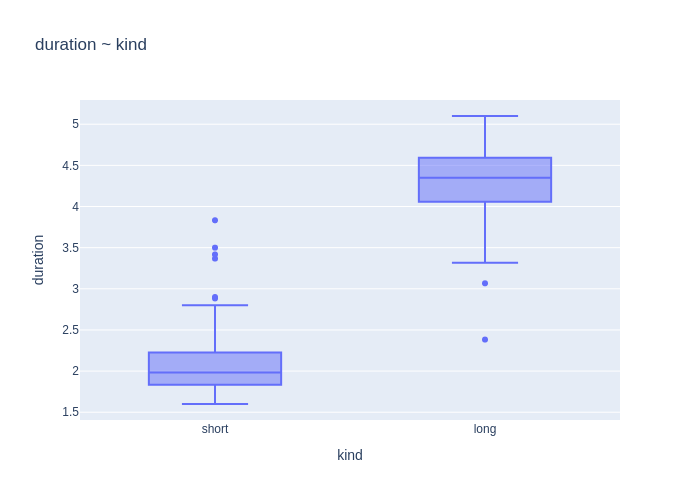

In [17]:
from IPython.display import display
import plotly.express as px

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") 

- With a t-value of 42.464 and a p-value of 0.000 (p < 0.001), because this p-value is so low, we can reject the null hypothesis that there is no difference in eruption durations between "short" and "long" wait times. This provides strong evidence that the difference observed is statistically significant and not due to random chance, suggesting that there is a substantial difference in average duration between "short" and "long" wait times. The 95% confidence interval for this difference is [2.101, 2.306], meaning we expect the true difference in average duration between "long" and "short" groups to lie within this range.
- The highly significant p-value and large t-statistic provide strong evidence that the "long" and "short" wait groups differ on average in terms of duration. Specifically, the "long" wait group has an average duration approximately 2.20 minutes longer than the "short" wait group.

### Summary of Interactions with ChatGPT

We examined whether there is a difference in average `duration` between "short" and "long" wait times for the Old Faithful dataset using a new model specification. Here, wait times below 68 minutes are categorized as "short," while 68 minutes and above are "long." This distinction was captured by an indicator variable (`kind`).

#### Model Results
- **Intercept (Short Group):** The intercept (2.0943) represents the average `duration` for the "short" wait group.
- **Difference for Long Group:** The coefficient for the "long" group (2.2036) indicates that "long" waits have an average `duration` approximately 2.20 minutes longer than "short" waits.

#### Statistical Significance
- The results showed strong statistical significance (p < 0.001) for this difference, providing strong evidence against the null hypothesis of "no difference between groups."
- The 95% confidence interval for this difference is [2.101, 2.306], suggesting the true difference in average duration between the "long" and "short" groups likely lies within this range.

#### Conclusion
We found clear evidence that "long" wait times are associated with significantly longer `duration` compared to "short" wait times. This supports the hypothesis that there is a meaningful difference in `duration` based on the length of the wait time.


[Chatbot transcript](https://chatgpt.com/share/672c4bdd-e838-800f-9a60-e701c0e82b3c)

## Question 12


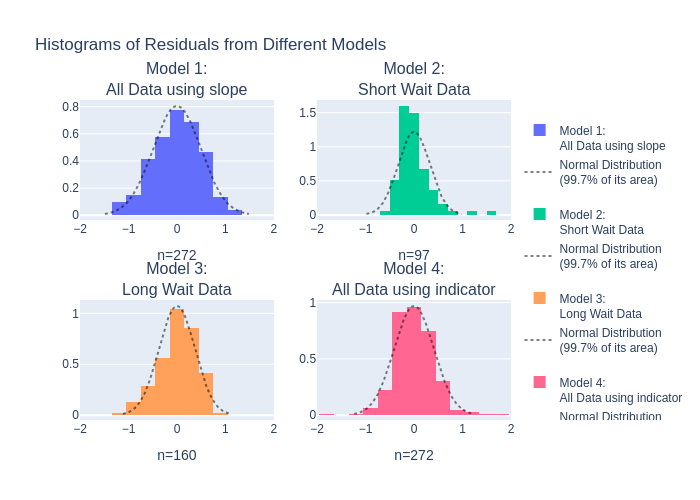

In [19]:
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

#### Best Models: Model 1 and Model 3
- **Model 1: All Data Using Slope**
- **Model 3: Long Wait Data**
  
  These models display residuals that are **symmetric** and **bell-shaped**, closely matching the expected shape of a normal distribution. This alignment suggests that the residuals are approximately normally distributed, strongly supporting the normality assumption for these models.

#### Marginal: Model 4
- **Model 4: All Data Using Indicator**

  The residuals for Model 4 are somewhat **symmetric** but show **slight flattening** (platykurtic shape), indicating a mild departure from normality. Although the residuals are centered around zero, the flatter distribution implies that the residuals do not cluster around the mean as closely as they would under a true normal distribution. Therefore, Model 4 only partially supports the normality assumption.

#### Least Suitable: Model 2
- **Model 2: Short Wait Data**

  Model 2 exhibits a **right-skewed** distribution with a long tail extending towards positive residual values, deviating significantly from a normal distribution shape. This skewness indicates that the residuals are not normally distributed, making Model 2 the least suitable model for satisfying the normality assumption.


## Question 13

#### A)

In [20]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Calculate the observed difference in means (Original Test Statistic)
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Initialize a list to store the permuted differences
n_permutations = 10000
permuted_diffs = []

# Permutation test: Shuffle the 'kind' labels and calculate the difference in means for each shuffle
for _ in range(n_permutations):
    shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)
    permuted_diff = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_diffs.append(permuted_diff)

# Convert the list of permuted differences into a numpy array
permuted_diffs = np.array(permuted_diffs)

# Calculate the p-value: proportion of permuted differences that are as extreme as or more extreme than the observed difference
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"Observed Difference: {observed_diff}")
print(f"P-value: {p_value}")


Observed Difference: 2.20360023255814
P-value: 0.0


#### B)

In [21]:
import seaborn as sns
import numpy as np

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Number of bootstrap samples
n_bootstrap = 10000

# List to store bootstrapped mean differences
bootstrapped_mean_differences = []

# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Resample the data with replacement for each group
    bootstrapped_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    
    # Calculate the mean difference for this bootstrap sample
    bootstrapped_diff = bootstrapped_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    
    # Append the bootstrapped mean difference to the list
    bootstrapped_mean_differences.append(bootstrapped_diff)

# Convert the list of bootstrapped mean differences into a numpy array
bootstrapped_mean_differences = np.array(bootstrapped_mean_differences)

# Calculate the 95% bootstrap confidence interval
conf_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval: {conf_interval}")


95% Bootstrap Confidence Interval: [2.09959133 2.30074395]


#### a)

Differences:

**Permutation Test**:
- Assumes the labels (`kind`) are exchangeable (no inherent difference between the groups).
- Shuffles the labels while keeping the data points fixed to test if the observed difference could be due to random chance.
- The focus is on testing the **null hypothesis** of no difference between the groups.


**Bootstrap Method**:
- Assumes that the observed data is a good representation of the population.
- Resamples the data within each group to estimate the sampling distribution of the statistic.
- The focus is on estimating the **confidence interval** for the difference in means, providing an idea of the uncertainty of the statistic.

Both methods are powerful non-parametric techniques because they don't rely on specific assumptions about the underlying data distribution. However, the **permutation test** is typically used for **hypothesis testing**, while the **bootstrap** is used for estimating **confidence intervals**.


#### b)
Comparison of the Methods

Similarities:

1. **Objective**: 
   - All three methods aim to assess the difference in means (or the effect of the `kind` variable) on the `duration`. They are designed to answer the same question: Is there a significant difference in the `duration` between the `short` and `long` groups?

2. **Non-parametric Nature**: 
   - The **permutation test** and **bootstrap method** are both **non-parametric** techniques, meaning they do not assume a specific distribution for the data (such as normality).
   - In contrast, the **indicator variable-based model** is **parametric**, assuming normality and linearity in the relationship between the variables.

3. **Computationally Intensive**: 
   - Both the **permutation test** and **bootstrap method** rely on **computational simulations**, running many iterations (shuffling or resampling) to generate distributions.
   - The **indicator variable-based model** can also be computationally intensive in large datasets due to model fitting, though typically it's more efficient than resampling methods.

Differences:

1. **Approach to Statistical Inference**:
   - The **permutation test** focuses on testing the **null hypothesis** (i.e., no difference between groups) by comparing the observed statistic to the distribution of test statistics under random permutations.
   - The **bootstrap method** focuses on estimating the **sampling distribution** of a statistic (the difference in means) and provides a **confidence interval** around that statistic.
   - The **indicator variable-based model** provides an **estimate of the difference in means** (through the coefficient of the indicator variable) and gives a **hypothesis test** (e.g., t-test for the coefficient) to assess statistical significance.

2. **Modeling Assumptions**:
   - The **permutation test** and **bootstrap method** do **not rely on any assumptions** about the distribution of the data.
   - The **indicator variable-based model** assumes that the relationship between `duration` and `kind` is **linear** and that the residuals of the model are **normally distributed**.

3. **Interpretation**:
   - The **permutation test** gives a **p-value** based on the extremity of the observed difference relative to the permuted differences.
   - The **bootstrap method** gives a **confidence interval** that reflects the range of possible values for the difference in means.
   - The **indicator variable-based model** provides an **estimate of the difference in means** between `short` and `long` (via the coefficient of the indicator variable), along with a **confidence interval** or **p-value** for that estimate.


### Summary of Interactions with ChatGPT
**Summary of Interaction**

1. **Permutation Test**
   - We discussed how to perform a **permutation test** to assess whether there is a significant difference in the `duration` between `short` and `long` waiting times in the **Old Faithful Geyser dataset**.
   - The permutation test works by **shuffling the labels** (i.e., `kind` values) and comparing the observed difference in means to the distribution of differences generated by random shuffling.
   - The null hypothesis of the test is that there is no difference between the two groups.

2. **Bootstrap Confidence Interval**
   - We also created a **bootstrap confidence interval** for the difference in means between the two groups.
   - In this method, we **resample the data with replacement** within each group (`short` and `long`) and calculate the difference in means for each resample. The 95% confidence interval is obtained by calculating the 2.5% and 97.5% quantiles of these differences.
   - This approach provides an estimate of the uncertainty in the difference between the groups.

3. **Comparison with Indicator Variable-Based Model**
   - We compared the **permutation test** and **bootstrap method** with the **indicator variable-based model** used in **Question 11**.
   - We discussed how the **indicator variable model** is a **parametric regression approach** that assumes a linear relationship and normality in residuals, while the permutation and bootstrap methods are **non-parametric** and do not make assumptions about the distribution of the data.
   - The **permutation test** focuses on testing the null hypothesis of no difference between the groups, while the **bootstrap method** estimates the uncertainty in the difference (confidence interval). The **indicator variable model** provides a coefficient estimate for the difference between the groups along with a hypothesis test.

4. **Key Differences**
   - The **permutation** and **bootstrap methods** are flexible and do not require distributional assumptions but are computationally intensive, focusing on testing the hypothesis or estimating confidence intervals.
   - The **indicator variable-based model** uses a parametric approach, fits a regression model, and assumes linearity and normality in the residuals.


[Chatbot transcript](https://chatgpt.com/share/672c5276-f07c-800b-bbc8-7f27323a9c69)

## Question 14
Yes!